In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from datetime import datetime
import os

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('dark')

In [3]:
os.environ['TIINGO_API_KEY'] = 'ba62a0fba810f937382b5e772f8f152b58c4ebfc'

In [4]:
def cum_rets(x):
    return np.log(x[-1]/x[0])

In [5]:
start = datetime(2005, 9, 1)
end = datetime(2019, 9, 1)
df = web.DataReader(['SPY'], 'tiingo', start, end)

In [6]:
# resample for business days
df = df.loc['SPY'].resample('B').last()
#df = pd.read_csv('data.csv', index_col=['date']).resample('B').last()

In [7]:
df.head()

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,
2005-09-01,93.126191,93.627973,92.099819,93.141397,74583200.0,122.49,0.0,123.15,121.14,122.51,1.0,74583200.0
2005-09-02,92.958931,93.422699,92.784067,93.399891,47658500.0,122.27,0.0,122.88,122.04,122.85,1.0,47658500.0
2005-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06,94.046125,94.122153,93.247835,93.255438,57258600.0,123.70,0.0,123.80,122.65,122.66,1.0,57258600.0
2005-09-07,94.205783,94.373044,93.863659,93.992906,41772100.0,123.91,0.0,124.13,123.46,123.63,1.0,41772100.0


In [8]:
df['logP'] = np.log(df['close'])
df['cum_rets'] = df.rolling(2).apply(lambda x: x[-1] - x[0])['logP']
df.head(10)

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,logP,cum_rets
date,,,,,,,,,,,,,,
2005-09-01,93.126191,93.627973,92.099819,93.141397,74583200.0,122.49,0.0,123.15,121.14,122.51,1.0,74583200.0,4.808029,NaN
2005-09-02,92.958931,93.422699,92.784067,93.399891,47658500.0,122.27,0.0,122.88,122.04,122.85,1.0,47658500.0,4.806232,-0.001798
2005-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06,94.046125,94.122153,93.247835,93.255438,57258600.0,123.70,0.0,123.80,122.65,122.66,1.0,57258600.0,4.817859,NaN
2005-09-07,94.205783,94.373044,93.863659,93.992906,41772100.0,123.91,0.0,124.13,123.46,123.63,1.0,41772100.0,4.819555,0.001696
2005-09-08,93.894070,94.274208,93.749618,94.015714,39074300.0,123.50,0.0,124.00,123.31,123.66,1.0,39074300.0,4.816241,-0.003314
2005-09-09,94.730373,94.836812,94.122153,94.144961,44113400.0,124.60,0.0,124.74,123.80,123.83,1.0,44113400.0,4.825109,0.008867
2005-09-12,94.540304,94.783593,94.479482,94.616332,33029700.0,124.35,0.0,124.67,124.27,124.45,1.0,33029700.0,4.823100,-0.002008
2005-09-13,94.015714,94.593524,93.909275,94.373044,58479400.0,123.66,0.0,124.42,123.52,124.13,1.0,58479400.0,4.817536,-0.005564


In [9]:
rets_df = df.unstack('symbol')['cum_rets']

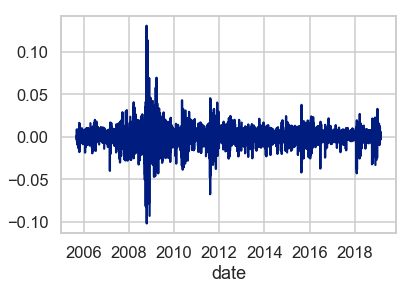

In [10]:
df['cum_rets'].plot()

C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


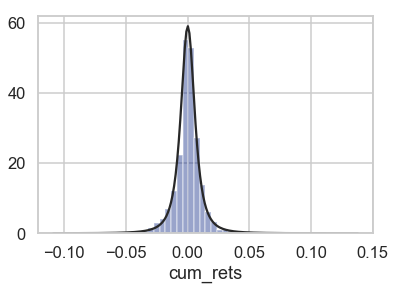

In [11]:
sns.distplot(df['cum_rets'].dropna(), kde=False, fit=stats.t)

# Quest for invariance

In [12]:
from scipy.stats import t as t_student
from scipy.stats import norm
import scipy.stats as stats

In [13]:
spy_cum_returns = df.dropna()['cum_rets'].resample('B').last()

In [14]:
from scipy.stats import t as t_student

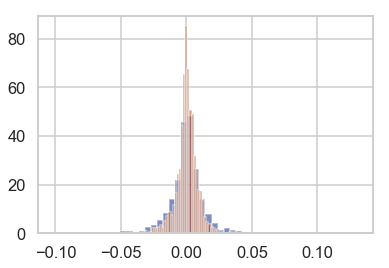

In [15]:
N = int(len(spy_cum_returns.dropna()))
x1 = spy_cum_returns.dropna().iloc[:int(N/2)]
x2 = spy_cum_returns.dropna().iloc[int(N/2):]
fig, ax = plt.subplots(1,1)
x1.hist(bins=50, alpha=0.5, normed=True)
x2.hist(bins=50, alpha=0.5, normed=True)

C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


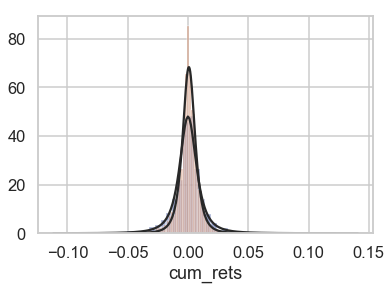

In [16]:
fig, ax =plt.subplots(1,1)
sns.distplot(x1, kde=False, fit=stats.t, ax=ax)
sns.distplot(x2, kde=False, fit=stats.t, ax=ax)

In [17]:
t_params1 = t_student.fit(x1)
t_params2 = t_student.fit(x2)

In [18]:
stats.describe(x1)

DescribeResult(nobs=1635, minmax=(-0.10163963279324584, 0.13068451592197583), mean=4.653936302520274e-05, variance=0.00021861249684867592, skewness=-0.01663396765347246, kurtosis=11.250606832724879)

In [19]:
stats.describe(x2)

DescribeResult(nobs=1635, minmax=(-0.042722207446439064, 0.03767506060909387), mean=0.00038541290273334816, variance=6.639052910069069e-05, skewness=-0.5979147000664394, kurtosis=2.9811167820345297)

In [20]:
y1 = spy_cum_returns.dropna().iloc[0::2]
y2 = spy_cum_returns.dropna().iloc[1::2]

C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


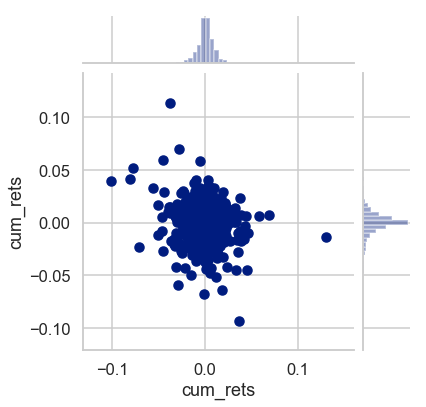

In [21]:
ax = sns.jointplot(x=y1, y=y2, data=df)

# Statistical properties over time sampling

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


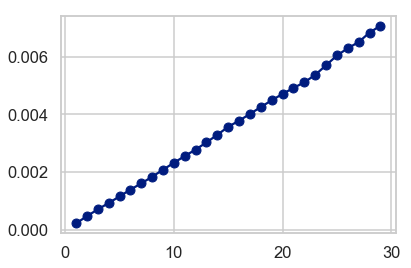

In [39]:
n_days = range(1,30)
means = []
stds = []
for n in n_days:
    real_rets = df.resample(str(n)+'B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()
    means.append(real_rets.mean())
    stds.append(real_rets.std())

plt.plot(n_days, means,'o-')

# Estimation

In [66]:
invariants = df.resample('B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [67]:
distribution = stats.norm
sample_size=5000

In [68]:
invariants = invariants#[(invariants>invariants.quantile(0.05))&(invariants<invariants.quantile(0.95))]

In [69]:
dist_fit_params = distribution.fit(invariants)
dist_fit_params

(0.00021597613287927545, 0.011934951399356108)

In [70]:
fit_sample = distribution.rvs(*dist_fit_params, size=sample_size)

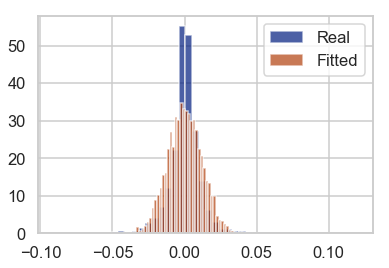

In [71]:
plt.hist(invariants, bins=50, normed=True, alpha=0.7, label='Real')
plt.hist(fit_sample[(fit_sample>min(invariants))*(fit_sample<max(invariants))], bins=50, normed=True, alpha=0.7, label='Fitted')
plt.xlim(min(invariants), max(invariants))
plt.legend()

## Projection

In [72]:
projections_df = pd.DataFrame()

In [73]:
sample_size = 5000
projected_sample = np.zeros(sample_size)
for n_days in [1,3,5,10,15]:
    for k in range(n_days):
        projected_sample += distribution.rvs(*dist_fit_params, size=sample_size)
    projections_df[n_days] = projected_sample

### Projection over 1 month

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


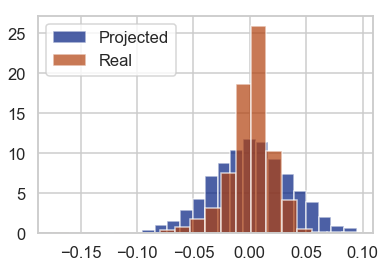

In [74]:
n_days = 5
real_rets = df.resample(str(n_days)+'B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()
proj_rets = projections_df[n_days][(projections_df[n_days]<max(real_rets)) & (projections_df[n_days]>min(real_rets))]

plt.hist(proj_rets, bins=20, normed=True, alpha=0.7, label='Projected')
plt.hist(real_rets, bins=20, normed=True, alpha=0.7, label='Real')
plt.legend()

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


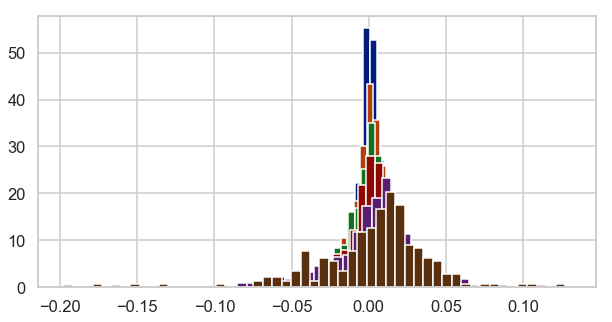

In [75]:
fig = plt.figure(figsize=(10,5))

for n_days in [1,2,3,5,10,15]:
    real_rets = df.resample(str(n_days)+'B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()
    real_rets.hist(normed=True, bins=50)

# Projection of all

In [76]:
sample_size = 5000
projected_sample = np.zeros(sample_size)

days = list(range(31))+[180]
            
for n_days in days:
    for k in range(n_days):
        projected_sample += distribution.rvs(*dist_fit_params, size=sample_size)
    projections_df[n_days] = projected_sample

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


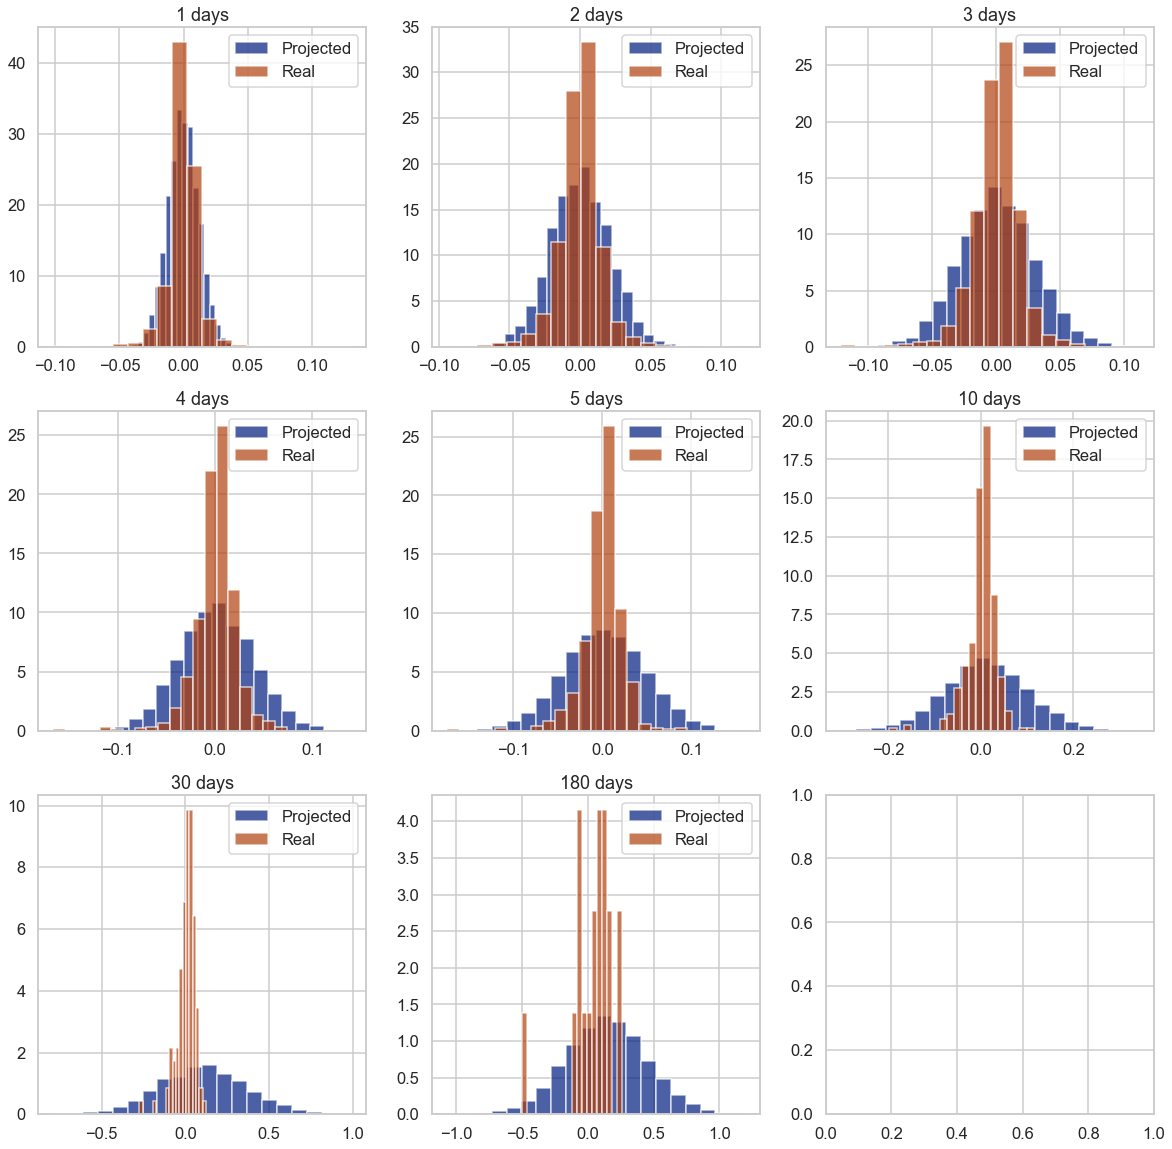

In [77]:
plotdays=[1,2,3,4,5,10,30,180]
fig, ax = plt.subplots(3,3, figsize=(20,20))
for n, n_days in enumerate(plotdays):
    real_rets = df.resample(str(n_days)+'B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()
    proj_rets = projections_df[n_days]#[(projections_df[n_days]<max(real_rets)) & (projections_df[n_days]>min(real_rets))]

    ax.ravel()[n].hist(proj_rets, bins=20, normed=True, alpha=0.7, label='Projected')
    ax.ravel()[n].hist(real_rets, bins=20, normed=True, alpha=0.7, label='Real')
    ax.ravel()[n].legend()
    ax.ravel()[n].set_title('%i days' % n_days)

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


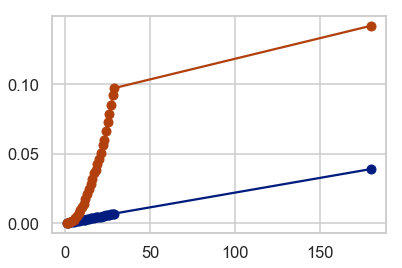

In [79]:
n_days = list(range(1,30))+[180]
means = []
proj_means = []
stds = []
proj_stds = []
for n in n_days:
    real_rets = df.resample(str(n)+'B').last().rolling(2).apply(lambda x: x[-1]-x[0])['logP'].dropna()
    proj_rets = projections_df[n]
    means.append(real_rets.mean())
    stds.append(real_rets.std())
    proj_means.append(proj_rets.mean())
    proj_stds.append(proj_rets.std())

plt.plot(n_days, means,'o-')
plt.plot(n_days, proj_means,'o-')